In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Lecture 8 

To practice visualizing data, let's examine the top 200 movies that have made the most money.


## Categorical Distribution ##

In [8]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
# view the studios
studios = top.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
# create a frequency table showing how top movies each studio has produced
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [6]:
sum(studio_distribution.column(1))

200

## Bar Charts ##

We can visual the number of items in each category using a bar plot. This can be done using the `tb.barh()` method. 

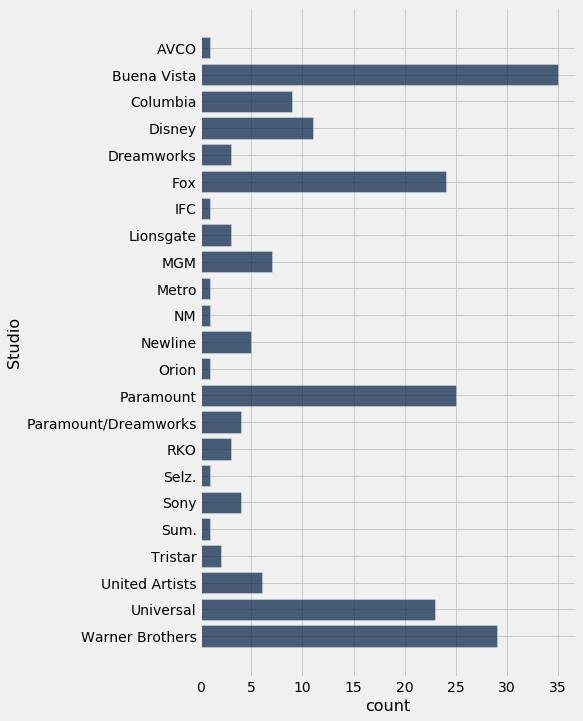

In [7]:
studio_distribution.barh('Studio')

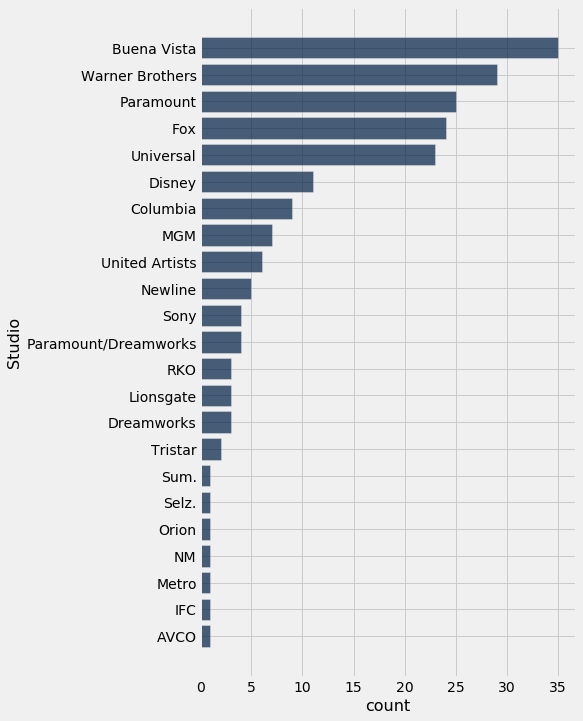

In [6]:
# often it's useful to create a bar plot sorted by counts
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

Let's examine visualizations of numerical data by looking at how old the top grossing movies are. 

In [9]:
# add the movie age to the top Table
ages = 2022 - top.column('Year')
top = top.with_column('Age', ages)

In [10]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Star Wars,Fox,460998007,1583483200,1977,44
The Sound of Music,Fox,158671368,1266072700,1965,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,39
Titanic,Paramount,658672302,1204368000,1997,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65
Jaws,Universal,260000000,1138620700,1975,46
Doctor Zhivago,MGM,111721910,1103564200,1965,56
The Exorcist,Warner Brothers,232906145,983226600,1973,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84


## Binning ##

We can bin numerical data by creating a set of bins end points, and then calculating how many data points fall within each bin. 


In [29]:
[min(ages), max(ages)]

[5, 101]

In [32]:
# create the bin end points
my_bins = np.arange(0, 121, 20)
my_bins

array([  0,  20,  40,  60,  80, 100, 120])

In [33]:
# Bin the ages of movies into bins of [ ). The last row just gives the end of the last bin and is always 0. 
top.bin('Age', bins = my_bins)

bin,Age count
0,61
20,62
40,49
60,21
80,6
100,1
120,0


In [35]:
# It is possible to bin with intervals of different sizes
uneven_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101)
uneven_bins

array([  0,   5,  10,  15,  25,  40,  65, 101], dtype=int64)

In [36]:
# Bin the ages of movies into bins of [ ). The last row just gives the end of the last bin and is always 0. 
top.bin('Age', bins = uneven_bins)

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


In [37]:
sum(top.bin('Age', bins = uneven_bins).column(1))

200

## Histograms ##

Histograms are a useful way to visual numerical data. To create a histogram we binned the data, and then treated the bins as categories and create a bar plot of the resulting data. 


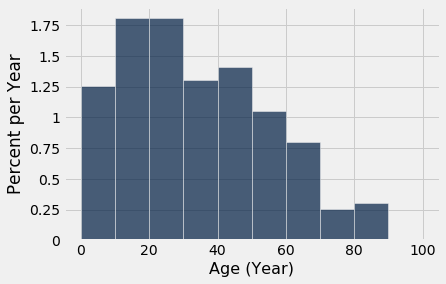

In [44]:
# histogram with even bin sizes
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Years')

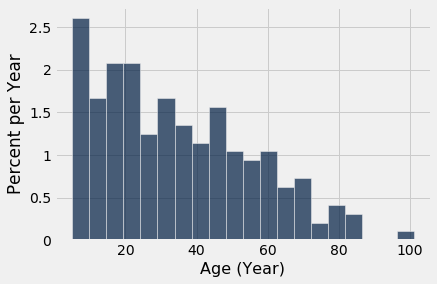

In [45]:
# We can also specify the number of evenly sized bins we want.
top.hist('Age', bins = 20, unit = 'Years')

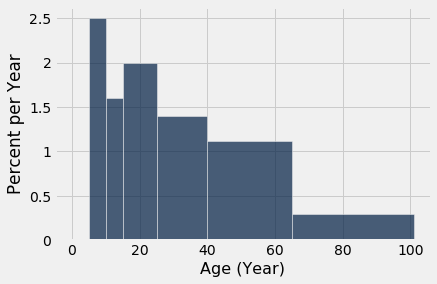

In [41]:
# We can create histograms of uneven bin sizes. 
# The *area* of the bar should be proportional to the number of items in a bin range. 
top.hist('Age', bins = uneven_bins, unit = 'Years')